In [1]:
from sklearn.datasets import load_boston
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
data = load_boston()

In [3]:
data.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])

In [4]:
X = pd.DataFrame(data=data.data, columns=data.feature_names)

In [5]:
y = pd.DataFrame(data = data.target, columns=['house_price'])

In [6]:
df = pd.concat([X, y], axis = 1)

In [7]:
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,house_price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


<AxesSubplot: >

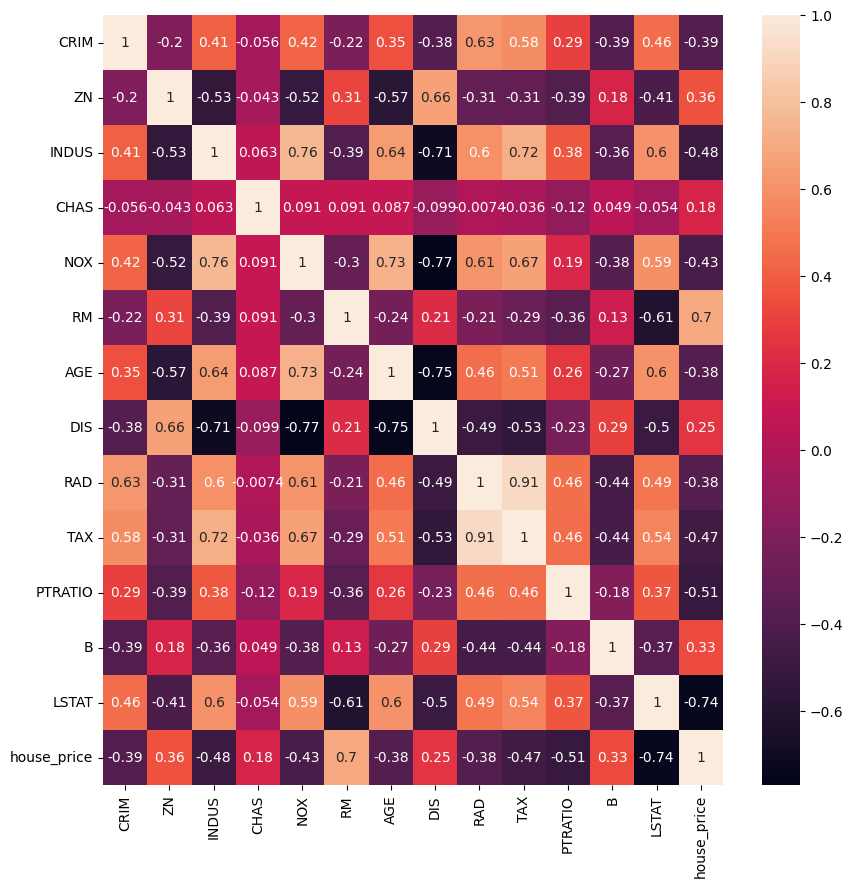

In [8]:
plt.figure(figsize=(10, 10))
sns.heatmap(df.corr(), annot=True)

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
from sklearn.preprocessing import QuantileTransformer

In [12]:
scale = QuantileTransformer()

In [13]:
X_train=scale.fit_transform(X_train)
X_test=scale.transform(X_test)

In [14]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [15]:
y_pred_train = regressor.predict(X_train)

In [16]:
y_pred_test = regressor.predict(X_test)

In [17]:
from sklearn.metrics import r2_score

In [18]:
print(f"r2 score : {r2_score(y_train, y_pred_train)}")

r2 score : 0.734084354654049


In [19]:
print(f"r2 score : {r2_score(y_test, y_pred_test)}")

r2 score : 0.7170352676700293


In [20]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
mse = cross_val_score(regressor, X_train, y_train, scoring="neg_mean_squared_error", cv = 5)
mean = np.mean(mse)
print(mean)

-24.625470819524573


<AxesSubplot: xlabel='house_price', ylabel='Density'>

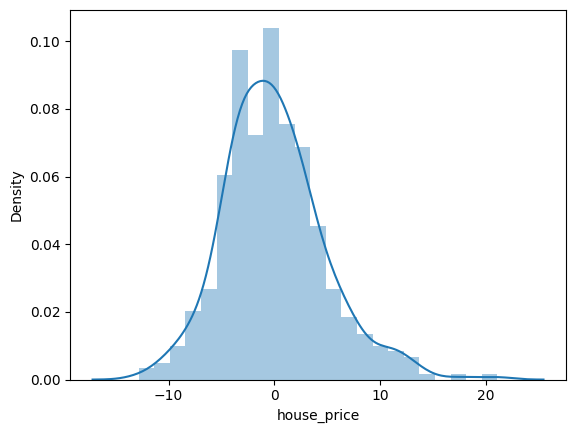

In [21]:
sns.distplot((y_train-y_pred_train)['house_price'])

<AxesSubplot: xlabel='house_price', ylabel='Density'>

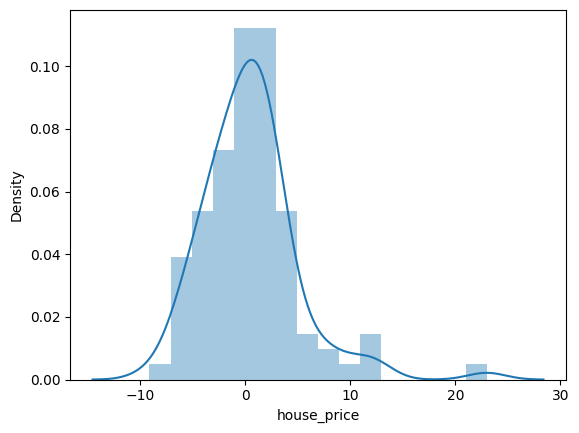

In [22]:
sns.distplot((y_test-y_pred_test)['house_price'])

In [23]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

ridge=Ridge()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100,120,130,140,150,160,180,190]}
ridge_regressor=GridSearchCV(ridge,parameters,scoring='neg_mean_squared_error',cv=5)
ridge_regressor.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 35, 40, 45, 50, 55, 100, 120, 130,
                                   140, 150, 160, 180, 190]},
             scoring='neg_mean_squared_error')

In [24]:
print(ridge_regressor.best_params_)
print(ridge_regressor.best_score_)

{'alpha': 0.01}
-24.624363144852804


In [25]:
y_pred_train = ridge_regressor.predict(X_train)
y_pred_test = ridge_regressor.predict(X_test)
print(f"r2 score : {r2_score(y_train, y_pred_train)}")
print("\n")
print(f"r2 score : {r2_score(y_test, y_pred_test)}")

r2 score : 0.7340841600898577


r2 score : 0.7170691475311471


<AxesSubplot: xlabel='house_price', ylabel='Density'>

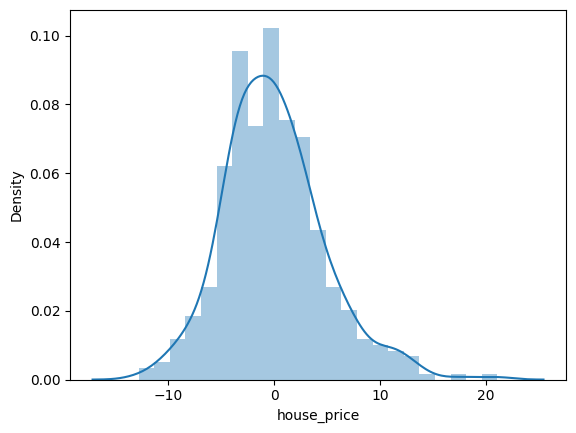

In [26]:
sns.distplot((y_train-y_pred_train)['house_price'])

<AxesSubplot: xlabel='house_price', ylabel='Density'>

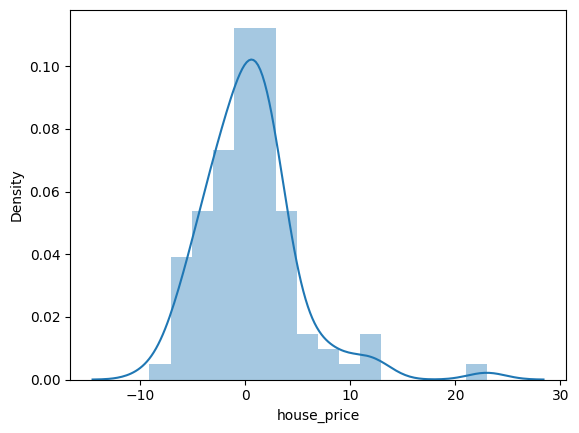

In [27]:
sns.distplot((y_test-y_pred_test)['house_price'])

In [28]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
lasso=Lasso()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100]}
lasso_regressor=GridSearchCV(lasso,parameters,scoring='neg_mean_squared_error',cv=5)

lasso_regressor.fit(X_train,y_train)
print(lasso_regressor.best_params_)
print(lasso_regressor.best_score_)

{'alpha': 0.01}
-24.588213735883194


In [29]:
y_pred_train = ridge_regressor.predict(X_train)
y_pred_test = ridge_regressor.predict(X_test)
print(f"r2 score : {r2_score(y_train, y_pred_train)}")
print("\n")
print(f"r2 score : {r2_score(y_test, y_pred_test)}")

r2 score : 0.7340841600898577


r2 score : 0.7170691475311471


In [30]:
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV
elastic=ElasticNet()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100]}
elastic_regressor=GridSearchCV(elastic,parameters,scoring='neg_mean_squared_error',cv=5)

elastic_regressor.fit(X_train,y_train)
print(elastic_regressor.best_params_)
print(elastic_regressor.best_score_)

{'alpha': 0.001}
-24.61013505958889


In [31]:
y_pred_train = ridge_regressor.predict(X_train)
y_pred_test = ridge_regressor.predict(X_test)
print(f"r2 score : {r2_score(y_train, y_pred_train)}")
print("\n")
print(f"r2 score : {r2_score(y_test, y_pred_test)}")

r2 score : 0.7340841600898577


r2 score : 0.7170691475311471


In [32]:
X = df.iloc[:, :-1]

In [33]:
X

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [34]:
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()

In [35]:
scaled_data = scale.fit_transform(X)

In [36]:
scaled_data

array([[-0.41978194,  0.28482986, -1.2879095 , ..., -1.45900038,
         0.44105193, -1.0755623 ],
       [-0.41733926, -0.48772236, -0.59338101, ..., -0.30309415,
         0.44105193, -0.49243937],
       [-0.41734159, -0.48772236, -0.59338101, ..., -0.30309415,
         0.39642699, -1.2087274 ],
       ...,
       [-0.41344658, -0.48772236,  0.11573841, ...,  1.17646583,
         0.44105193, -0.98304761],
       [-0.40776407, -0.48772236,  0.11573841, ...,  1.17646583,
         0.4032249 , -0.86530163],
       [-0.41500016, -0.48772236,  0.11573841, ...,  1.17646583,
         0.44105193, -0.66905833]])

In [37]:
from sklearn.decomposition import PCA

In [38]:
pca = PCA()

In [39]:
pca.fit_transform(scaled_data)

array([[-2.09829747,  0.77311275,  0.34294273, ..., -0.03300036,
         0.01944023,  0.36597533],
       [-1.45725167,  0.59198521, -0.69519931, ..., -0.64080983,
        -0.12579741, -0.07071949],
       [-2.07459756,  0.5996394 ,  0.1671216 , ..., -0.48755672,
         0.13332653, -0.0140218 ],
       ...,
       [-0.31236047,  1.15524644, -0.40859759, ...,  0.11565634,
         0.28196407,  0.06247358],
       [-0.27051907,  1.04136158, -0.58545406, ...,  0.0870124 ,
         0.30170082,  0.05436991],
       [-0.12580322,  0.76197805, -1.294882  , ...,  0.18432101,
         0.23273318,  0.01970872]])

In [40]:
pca.explained_variance_ratio_

array([0.47129606, 0.11025193, 0.0955859 , 0.06596732, 0.06421661,
       0.05056978, 0.04118124, 0.03046902, 0.02130333, 0.01694137,
       0.0143088 , 0.01302331, 0.00488533])

In [45]:
np.cumsum(pca.explained_variance_ratio_)

array([0.47129606, 0.581548  , 0.67713389, 0.74310121, 0.80731782,
       0.8578876 , 0.89906884, 0.92953786, 0.9508412 , 0.96778257,
       0.98209137, 0.99511467, 1.        ])

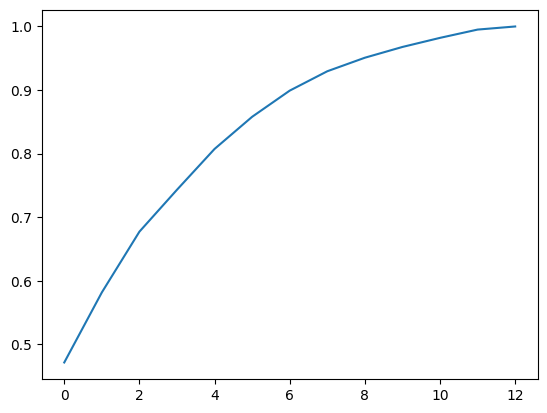

In [44]:
plt.plot([i for i in range(13)], np.cumsum(pca.explained_variance_ratio_))